# Data Visualisation
## Age histogram
We cannot see a delay in a graph because there are no time or duration variables present.

the maximal age of a patient is:  100
the minimal age of a patient is:  0


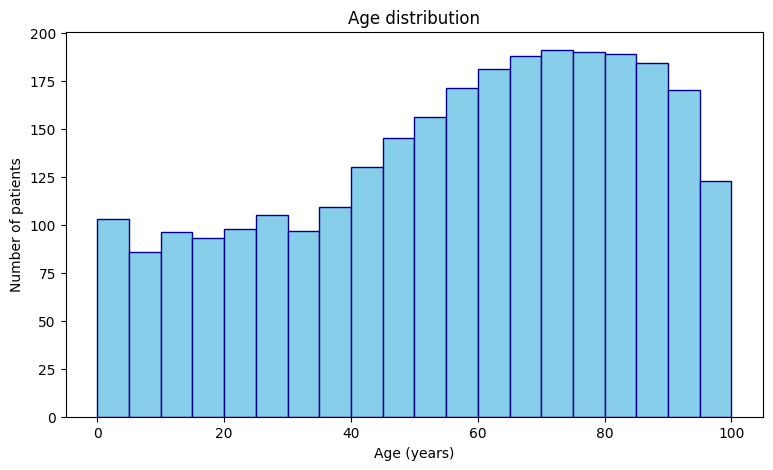

In [ ]:
import matplotlib.pyplot as plt
import numpy as num
import pandas as pd
import os
os.getcwd()

os.chdir(r"c:\dev\Hospital_ml\Predictive analysis of critical incidents in a hospital")

primary = pd.read_csv("data/primary_cohort_clean.csv")
study = pd.read_csv("data/study_cohort_clean.csv")
validation = pd.read_csv("data/validation_cohort_clean.csv")
df = pd.concat([primary, study, validation], ignore_index=True)
df.shape

print("the maximal age of a patient is: ", df["age_years"].max())
print("the minimal age of a patient is: ", df["age_years"].min())

plt.figure(figsize=(9,5))
plt.hist(df['age_years'], bins=20, color='skyblue', edgecolor='darkblue')
plt.title("Age distribution")
plt.xlabel("Age (years)")
plt.ylabel("Number of patients")
plt.show()



## Comparison of survivors vs. non-survivors
By using ea box plot

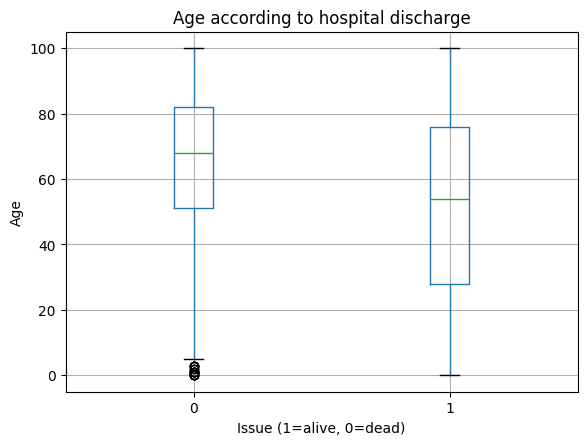

In [23]:
df.boxplot(column='age_years', by='hospital_outcome_1alive_0dead')
plt.title("Age according to hospital discharge")
plt.suptitle("")
plt.xlabel("Issue (1=alive, 0=dead)")
plt.ylabel("Age")
plt.show()


## Distribution of the target variable
With a bar card
survivors vs deaths

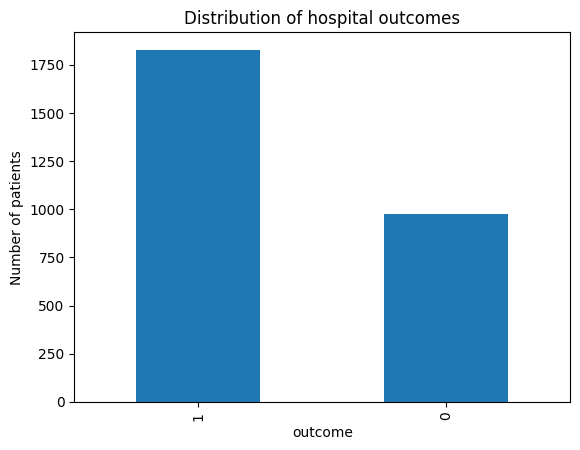

In [22]:
df['hospital_outcome_1alive_0dead'].value_counts().plot(kind='bar')
plt.title("Distribution of hospital outcomes")
plt.xlabel("outcome")
plt.ylabel("Number of patients")
plt.show()

## Correlations between numerical variables
With a heatmap

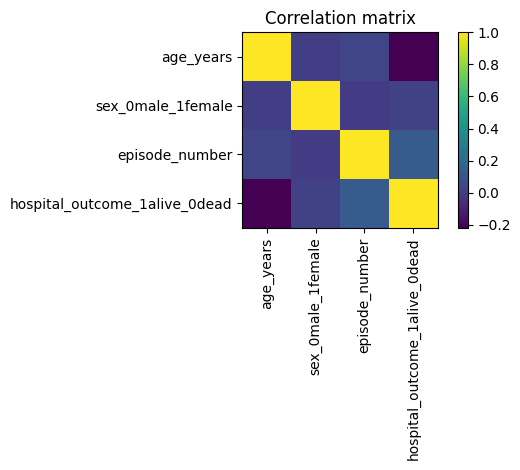

In [24]:


corr = df.corr()

plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()


## Targeted scatter plot
two must important variables such as 'age_years' and 'episode_number'.
See direct relationship between two key variables.

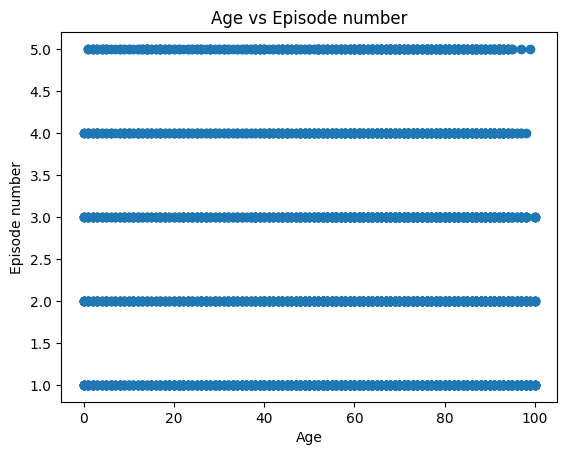

In [25]:
plt.scatter(df['age_years'], df['episode_number'])
plt.xlabel("Age")
plt.ylabel("Episode number")
plt.title("Age vs Episode number")
plt.show()


The initial scatter plot appears unusual due to the discrete nature of the episode_number variable, which only takes five distinct values. This results in a strong overlap of data points along horizontal lines. No clear relationship between patient age and the number of episodes is observed in this visualization, suggesting that age alone does not strongly influence the episode count. To improve interpretability, the scatter plot was enhanced by coloring the points according to hospital outcome, allowing a clearer visual comparison between survivors and non-survivors.

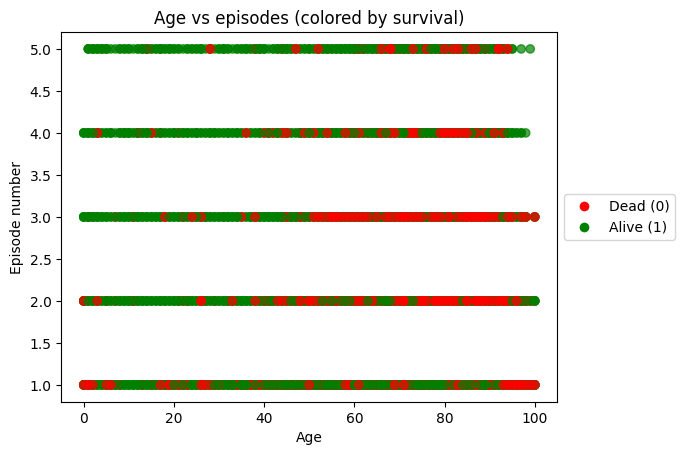

In [32]:

from matplotlib.colors import ListedColormap

cmap = ListedColormap(["red", "green"])

scatter = plt.scatter(
    df['age_years'],
    df['episode_number'],
    c=df['hospital_outcome_1alive_0dead'],
    cmap=cmap,
    alpha=0.7
)

plt.xlabel("Age")
plt.ylabel("Episode number")
plt.title("Age vs episodes (colored by survival)")


handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Dead (0)',
               markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Alive (1)',
               markerfacecolor='green', markersize=8)
]

plt.legend(handles=handles,
           loc="center left",
           bbox_to_anchor=(1, 0.5))
plt.show()


## Bar chart by group
sex vs survival

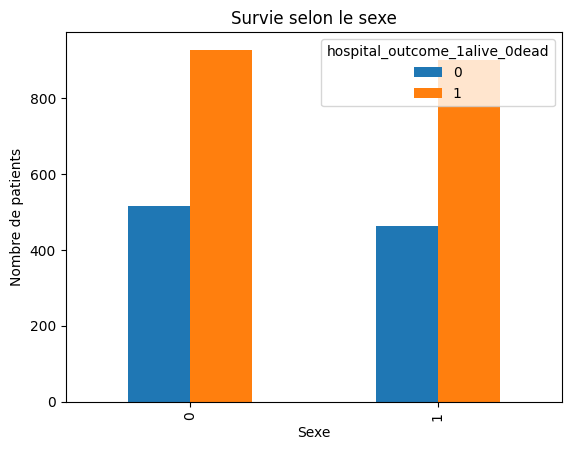

In [34]:
pd.crosstab(df['sex_0male_1female'],
            df['hospital_outcome_1alive_0dead']).plot(kind='bar')
plt.title("Survie selon le sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de patients")
plt.show()


## Outliers
global boxplot

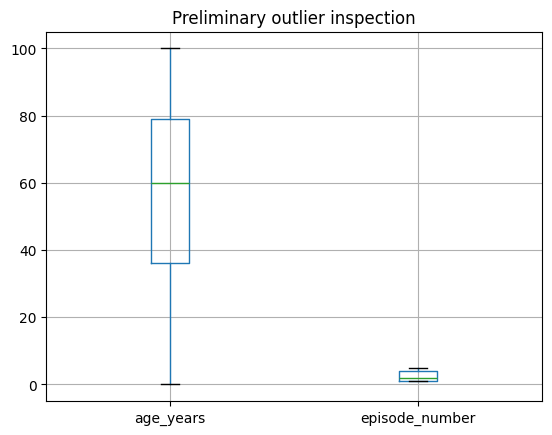

In [ ]:
df[['age_years', 'episode_number']].boxplot()
plt.title("Preliminary outlier inspection")
plt.show()